In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import os
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
sns.set(color_codes=True)

In [64]:
os.chdir('..')
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src'

In [127]:
with open('../result/epa_expansion/nn_result_github_all', 'r') as fp:
    github = json.load(fp)
with open('../result/epa_expansion/nn_result_twitter_all', 'r') as fp:
    twitter = json.load(fp)
from sample_seeds import read_warriner_ratings
warriner = read_warriner_ratings()

In [134]:
def get_tokenset(words_list):
    from nltk.corpus import wordnet as wn 
    words_list_pos = {
        wn.VERB: [],
        wn.NOUN: [],
        wn.ADV: [],
        wn.ADJ: []
    }
    
    for word in words_list:
        for pos in words_list_pos.keys():
            if word in set(w.name().split('.', 1)[0] for w in wn.synsets(word, pos=pos)):
                words_list_pos[pos].append(word)

    return words_list_pos


def tokenset_comp(words_list_pos):
    for pos in words_list_pos.keys():
        tokenlist = words_list_pos[pos]
        github_list = np.array([github[t] for t in tokenlist])
        twitter_list = np.array([twitter[t] for t in tokenlist])
        warriner_list = np.array([warriner[t] for t in tokenlist])
        for axis in range(0, 3):
            plt.figure()
            plt.title('%s %s' % (pos, axis))
            sns.distplot(github_list[:, axis], color='r', bins=1000)
            sns.distplot(twitter_list[:, axis], color='b', bins=1000)
            # sns.distplot(warriner_list[:, axis], color='g', bins=1000)
        print('===== %s %s =====' % (pos, len(tokenlist)))
        print(np.mean(github_list, axis=0))
        print(np.mean(np.abs(github_list), axis=0))
        print(np.std(github_list, axis=0))

        print(np.mean(twitter_list, axis=0))
        print(np.mean(np.abs(twitter_list), axis=0))
        print(np.std(twitter_list, axis=0))
        
        print(np.mean(warriner_list, axis=0))
        print(np.mean(np.abs(warriner_list), axis=0))
        print(np.std(warriner_list, axis=0))

In [130]:
words_list_pos = get_tokenset(set(github.keys()) & set(twitter.keys()) & set(warriner.keys()))

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== a 2071 =====
[ 0.26609104  0.71448075 -1.06775077]
[0.47112272 0.75148363 1.07034794]
[0.53446922 0.40920285 0.26963217]
[ 0.19705135  0.64088181 -0.96501624]
[0.56512016 0.72321153 0.98006144]
[0.70506098 0.51557603 0.37993304]
[ 0.31982602  0.64345013 -0.673708  ]
[1.37871192 1.28513774 1.16089525]
[1.62740347 1.41240333 1.22560175]
===== n 6315 =====
[ 0.38977198  0.7680573  -1.10463594]
[0.47032183 0.78447859 1.10780707]
[0.40466944 0.30912838 0.25355698]
[ 0.32220432  0.67832862 -1.06699037]
[0.55288084 0.73217715 1.07913838]
[0.60839859 0.43342597 0.37125302]
[ 0.42596928  0.7091273  -0.78083306]
[1.17298833 1.17997693 1.23116326]
[1.39686142 1.23089162 1.23639743]
===== r 88 =====
[ 0.34469813  0.72069814 -1.1019277 ]
[0.5772719  0.78442839 1.1019277 ]
[0.65149742 0.4757574  0.35248399]
[ 0.22675479  0.59894352 -1.07760611]
[0.56517371 0.71007353 1.11356183]
[0.70216127 0.53442637 0.44911437]
[ 0.54159997  0.68267685 -1.10294463]
[0.99636114 1.05253215 1.50506315]
[1.18908

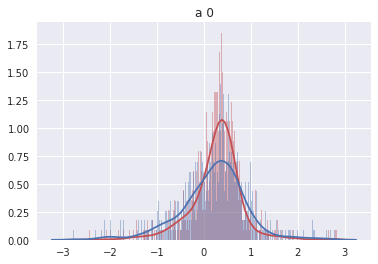

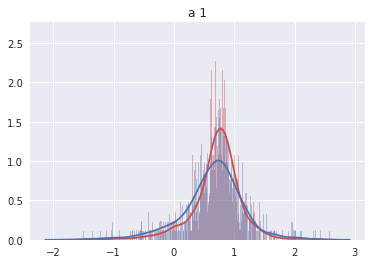

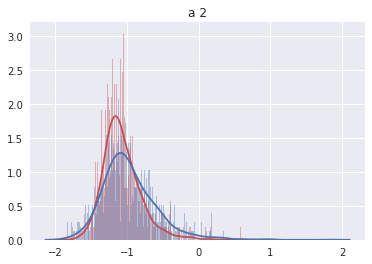

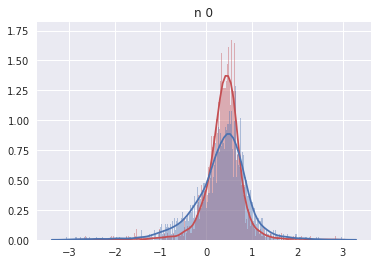

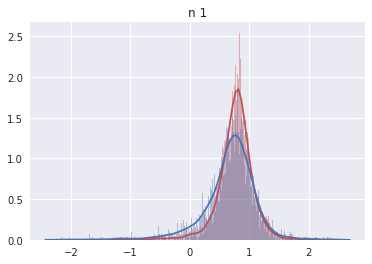

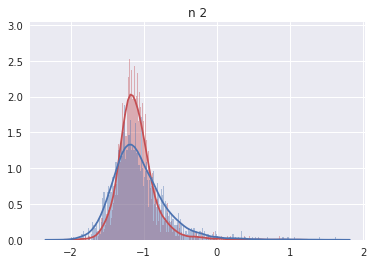

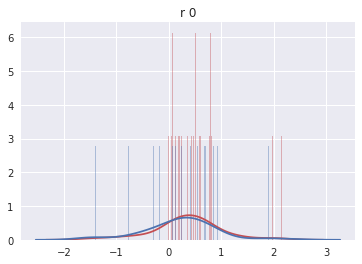

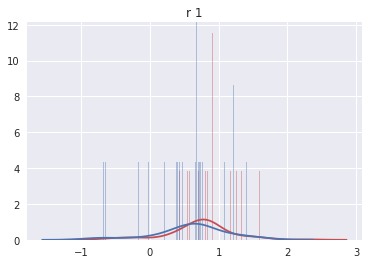

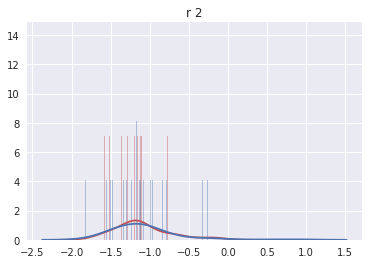

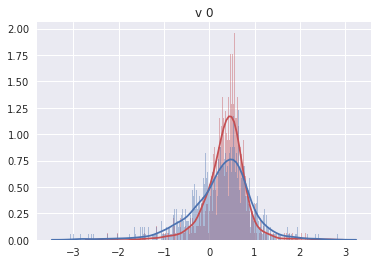

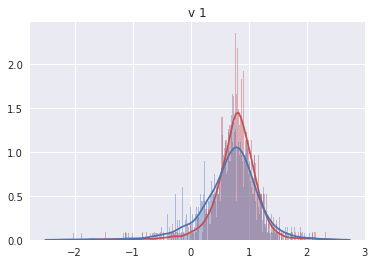

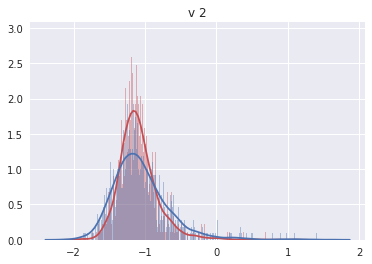

In [135]:
tokenset_comp(words_list_pos)